## Importación de librerías

In [ ]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## Carga de datos

Cargamos los datos preprocesados del notebook anterior y los datos de prueba originales.

In [ ]:
!pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

In [ ]:
import shutil

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia


  0%|          | 0.00/29.9M [00:00<?, ?B/s]
100%|##########| 29.9M/29.9M [00:00<00:00, 1.84GB/s]


In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
# Cargar datos preprocesados de entrenamiento
df_train = pd.read_csv('train_processed.csv')
print(f"Datos de entrenamiento cargados: {df_train.shape}")

# Cargar datos de prueba originales
df_test = pd.read_csv('test.csv')
print(f"Datos de prueba cargados: {df_test.shape}")

print("\nPrimeras 5 filas de los datos de entrenamiento:")
display(df_train.head())

Datos de entrenamiento cargados: (692500, 54)
Datos de prueba cargados: (296786, 20)

Primeras 5 filas de los datos de entrenamiento:


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,ESTU_PRGM_ACADEMICO_ORIGINAL,prgm_administracion de empresas,prgm_administracion en salud ocupacional,prgm_administracion financiera,prgm_arquitectura,prgm_comunicacion social,prgm_contaduria publica,prgm_derecho,prgm_economia,prgm_enfermeria,prgm_ingenieria ambiental,prgm_ingenieria civil,prgm_ingenieria de sistemas,prgm_ingenieria electronica,prgm_ingenieria industrial,prgm_ingenieria mecanica,prgm_licenciatura en pedagogia infantil,prgm_medicina,prgm_negocios internacionales,prgm_otros,prgm_psicologia,prgm_trabajo social,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si,FAMI_TIENEINTERNET_no info,ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENELAVADORA_No,FAMI_TIENELAVADORA_Si,FAMI_TIENELAVADORA_no info,FAMI_TIENEAUTOMOVIL_No,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENEAUTOMOVIL_no info,ESTU_PRIVADO_LIBERTAD_N,ESTU_PRIVADO_LIBERTAD_S,FAMI_TIENECOMPUTADOR_No,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENECOMPUTADOR_no info
0,904256,20212,enfermeria,BOGOTÁ,7.0,2.0,4.0,8.0,Si,12.0,3.0,0.322,0.208,0.310,0.267,enfermeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False
1,645256,20212,derecho,ATLANTICO,5.0,1.0,4.0,9.0,No,8.0,1.0,0.311,0.215,0.292,0.264,derecho,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False
2,308367,20203,otros,BOGOTÁ,5.0,5.0,4.0,7.0,Si,7.0,1.0,0.297,0.214,0.305,0.264,mercadeo y publicidad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False
3,470353,20195,administracion de empresas,SANTANDER,6.0,1.0,5.0,2.0,Si,7.0,4.0,0.485,0.172,0.252,0.190,administracion de empresas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False
4,989032,20212,psicologia,ANTIOQUIA,5.0,4.0,4.0,5.0,Si,5.0,2.0,0.316,0.232,0.285,0.294,psicologia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False


## Preparación de características y variable objetivo

Separamos las características (X) de la variable objetivo (y) y eliminamos columnas que no son útiles para la predicción.

In [ ]:
# Identificar columnas que no son características útiles
columns_to_drop = ['ESTU_CONSECUTIVO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_ACADEMICO_ORIGINAL']
columns_to_drop = [col for col in columns_to_drop if col in df_train.columns]

print(f"Columnas a eliminar: {columns_to_drop}")

# Separar características y variable objetivo
X = df_train.drop(columns=columns_to_drop + ['RENDIMIENTO_GLOBAL'])
y = df_train['RENDIMIENTO_GLOBAL']

print(f"\nCaracterísticas (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts().sort_index())

Columnas a eliminar: ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_ACADEMICO_ORIGINAL']

Características (X): (692500, 51)
Variable objetivo (y): (692500,)

Distribución de la variable objetivo:
RENDIMIENTO_GLOBAL
1.0    172987
2.0    172275
3.0    171619
4.0    175619
Name: count, dtype: int64


## Visualización de la distribución de la variable objetivo

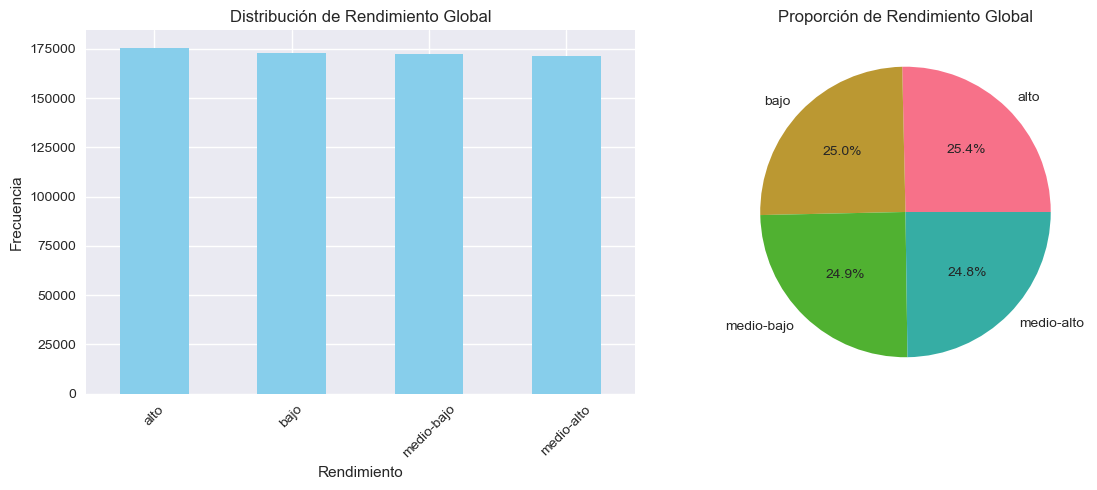


Estadísticas de la variable objetivo:
Clases balanceadas: 97.7% de balance


In [ ]:
# Crear mapeo de etiquetas para mejor visualización
label_mapping = {0: 'no info', 1: 'bajo', 2: 'medio-bajo', 3: 'medio-alto', 4: 'alto'}
y_labels = y.map(label_mapping)

plt.figure(figsize=(12, 5))

# Gráfico de barras
plt.subplot(1, 2, 1)
y_labels.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Rendimiento Global')
plt.xlabel('Rendimiento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)

# Gráfico de pastel
plt.subplot(1, 2, 2)
y_labels.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Rendimiento Global')
plt.ylabel('')

plt.tight_layout()
plt.show()

print("\nEstadísticas de la variable objetivo:")
print(f"Clases balanceadas: {y.value_counts().min() / y.value_counts().max() * 100:.1f}% de balance")

## División de datos en conjuntos de entrenamiento, validación y prueba

Utilizamos una división estratificada para mantener la proporción de clases en cada conjunto.

In [ ]:
# Primera división: 80% entrenamiento+validación, 20% prueba
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Segunda división: 75% entrenamiento, 25% validación (del 80% anterior)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de validación: {X_val.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Verificar que las proporciones se mantienen
print("\nDistribución en cada conjunto:")
print("Entrenamiento:")
print(y_train.value_counts().sort_index())
print("\nValidación:")
print(y_val.value_counts().sort_index())
print("\nPrueba:")
print(y_test.value_counts().sort_index())

Conjunto de entrenamiento: 415500 muestras
Conjunto de validación: 138500 muestras
Conjunto de prueba: 138500 muestras

Distribución en cada conjunto:
Entrenamiento:
RENDIMIENTO_GLOBAL
1.0    103793
2.0    103365
3.0    102971
4.0    105371
Name: count, dtype: int64

Validación:
RENDIMIENTO_GLOBAL
1.0    34597
2.0    34455
3.0    34324
4.0    35124
Name: count, dtype: int64

Prueba:
RENDIMIENTO_GLOBAL
1.0    34597
2.0    34455
3.0    34324
4.0    35124
Name: count, dtype: int64


## Normalización de características

Aplicamos StandardScaler para normalizar las características numéricas.

In [ ]:
# Verificar tipos de datos antes de normalización
print("Tipos de datos en X:")
print(X.dtypes.value_counts())
print(f"\nColumnas no numéricas encontradas:")
non_numeric_cols = X.select_dtypes(include=['object']).columns.tolist()
print(non_numeric_cols[:10] if len(non_numeric_cols) > 10 else non_numeric_cols)

# Separar columnas numéricas y categóricas
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumnas numéricas: {len(numeric_cols)}")
print(f"Columnas categóricas: {len(categorical_cols)}")

# Si hay columnas categóricas, necesitamos codificarlas primero
if categorical_cols:
    print(f"\nCodificando {len(categorical_cols)} columnas categóricas...")

    # Crear copias de los datos para procesar
    X_train_processed = X_train.copy()
    X_val_processed = X_val.copy()
    X_test_processed = X_test.copy()

    # Codificar variables categóricas
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        # Ajustar con todos los valores únicos de entrenamiento
        X_train_processed[col] = le.fit_transform(X_train_processed[col].astype(str))
        label_encoders[col] = le

        # Transformar validación y prueba
        X_val_processed[col] = le.transform(X_val_processed[col].astype(str))
        X_test_processed[col] = le.transform(X_test_processed[col].astype(str))

    print("Codificación categórica completada")
else:
    # Si no hay columnas categóricas, usar los datos originales
    X_train_processed = X_train
    X_val_processed = X_val
    X_test_processed = X_test

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con los datos de entrenamiento procesados
X_train_scaled = scaler.fit_transform(X_train_processed)
X_val_scaled = scaler.transform(X_val_processed)
X_test_scaled = scaler.transform(X_test_processed)

print("\nNormalización completada")
print(f"Media de características de entrenamiento después de escalado: {X_train_scaled.mean():.6f}")
print(f"Desviación estándar de características de entrenamiento después de escalado: {X_train_scaled.std():.6f}")
print(f"Forma final de datos escalados: {X_train_scaled.shape}")

Tipos de datos en X:
float64    30
bool       17
int64       2
object      2
Name: count, dtype: int64

Columnas no numéricas encontradas:
['ESTU_PRGM_DEPARTAMENTO', 'FAMI_TIENEINTERNET.1']

Columnas numéricas: 32
Columnas categóricas: 2

Codificando 2 columnas categóricas...
Codificación categórica completada

Normalización completada
Media de características de entrenamiento después de escalado: -0.000000
Desviación estándar de características de entrenamiento después de escalado: 1.000000
Forma final de datos escalados: (415500, 51)


## Selección de modelos mediante validación cruzada

Evaluamos diferentes algoritmos de machine learning usando validación cruzada estratificada.

In [ ]:
# Definir modelos a evaluar
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM (Linear)': LinearSVC(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Neighbors': KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar cada modelo
results = {}
for name, model in models.items():
    print(f"Evaluando {name}...")
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    results[name] = {
        'scores': cv_scores,
        'mean': cv_scores.mean(),
        'std': cv_scores.std()
    }
    print(f"  Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

print("\nEvaluación completada")

Evaluando Random Forest...
  Accuracy: 0.3947 (+/- 0.0027)
Evaluando Logistic Regression...
  Accuracy: 0.3834 (+/- 0.0028)
Evaluando SVM (Linear)...
  Accuracy: 0.3816 (+/- 0.0023)
Evaluando Gradient Boosting...
  Accuracy: 0.4120 (+/- 0.0026)
Evaluando K-Neighbors...
  Accuracy: 0.3503 (+/- 0.0019)
Evaluando Decision Tree...
  Accuracy: 0.3259 (+/- 0.0018)

Evaluación completada


## Visualización de resultados de validación cruzada

Ranking de modelos por accuracy:


,Model,Mean_Accuracy,Std_Accuracy
3,Gradient Boosting,0.412039,0.001287
0,Random Forest,0.394727,0.001347
1,Logistic Regression,0.383444,0.001389
2,SVM (Linear),0.381572,0.001154
4,K-Neighbors,0.350335,0.000959
5,Decision Tree,0.325928,0.000881


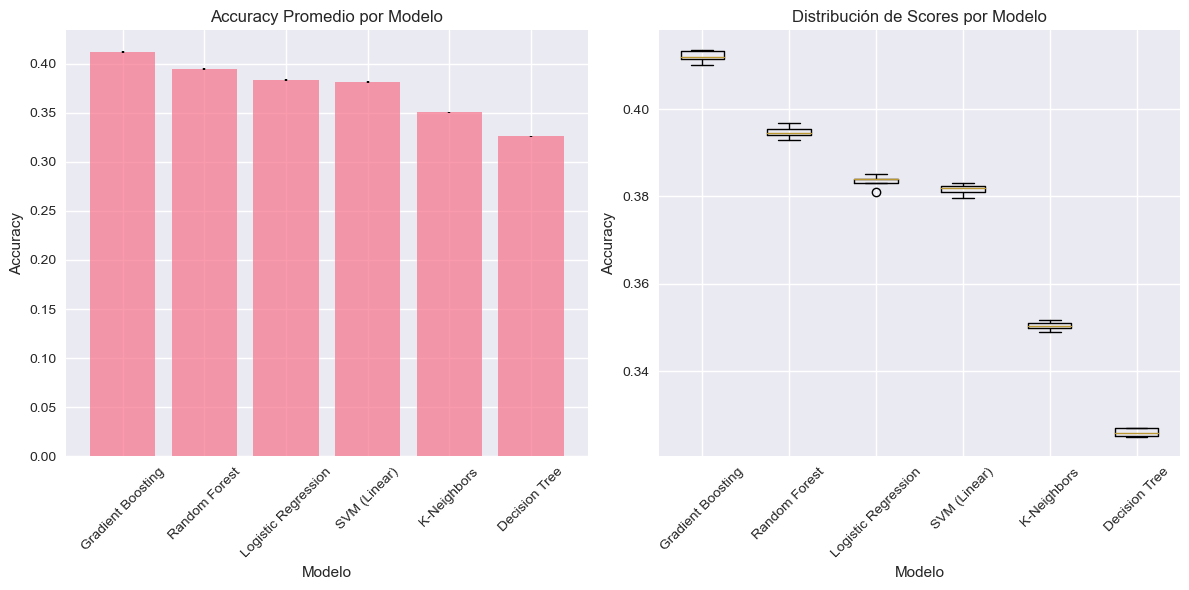


Mejor modelo: Gradient Boosting
Accuracy: 0.4120 (+/- 0.0026)


In [ ]:
# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Mean_Accuracy': [results[name]['mean'] for name in results.keys()],
    'Std_Accuracy': [results[name]['std'] for name in results.keys()]
}).sort_values('Mean_Accuracy', ascending=False)

print("Ranking de modelos por accuracy:")
display(results_df)

# Visualización
plt.figure(figsize=(12, 6))

# Gráfico de barras con error bars
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Mean_Accuracy'],
        yerr=results_df['Std_Accuracy'], capsize=5, alpha=0.7)
plt.title('Accuracy Promedio por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Box plot de los scores
plt.subplot(1, 2, 2)
scores_data = [results[name]['scores'] for name in results_df['Model']]
plt.boxplot(scores_data, labels=results_df['Model'])
plt.title('Distribución de Scores por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Identificar el mejor modelo
best_model_name = results_df.iloc[0]['Model']
print(f"\nMejor modelo: {best_model_name}")
print(f"Accuracy: {results_df.iloc[0]['Mean_Accuracy']:.4f} (+/- {results_df.iloc[0]['Std_Accuracy'] * 2:.4f})")

## Entrenamiento y evaluación del mejor modelo

Entrenamos el mejor modelo y lo evaluamos en el conjunto de validación.

In [ ]:
# Entrenar el mejor modelo
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Predicciones en validación
y_val_pred = best_model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Accuracy en validación: {val_accuracy:.4f}")

# Identificar clases presentes en validación
unique_classes_val = sorted(np.union1d(y_val.unique(), np.unique(y_val_pred)))
target_names_val = [label_mapping[i] for i in unique_classes_val if i in label_mapping]

print(f"\nClases presentes en validación: {unique_classes_val}")
print(f"Etiquetas correspondientes: {target_names_val}")

print("\nReporte de clasificación en validación:")
print(classification_report(y_val, y_val_pred, target_names=target_names_val, labels=unique_classes_val))
print(classification_report(y_val, y_val_pred, target_names=target_names_val, labels=unique_classes_val))

Accuracy en validación: 0.4106

Clases presentes en validación: [1.0, 2.0, 3.0, 4.0]
Etiquetas correspondientes: ['bajo', 'medio-bajo', 'medio-alto', 'alto']

Reporte de clasificación en validación:
              precision    recall  f1-score   support

        bajo       0.43      0.52      0.47     34597
  medio-bajo       0.33      0.27      0.30     34455
  medio-alto       0.31      0.23      0.27     34324
        alto       0.51      0.61      0.55     35124

    accuracy                           0.41    138500
   macro avg       0.39      0.41      0.40    138500
weighted avg       0.39      0.41      0.40    138500

              precision    recall  f1-score   support

        bajo       0.43      0.52      0.47     34597
  medio-bajo       0.33      0.27      0.30     34455
  medio-alto       0.31      0.23      0.27     34324
        alto       0.51      0.61      0.55     35124

    accuracy                           0.41    138500
   macro avg       0.39      0.41      0

## Matriz de confusión

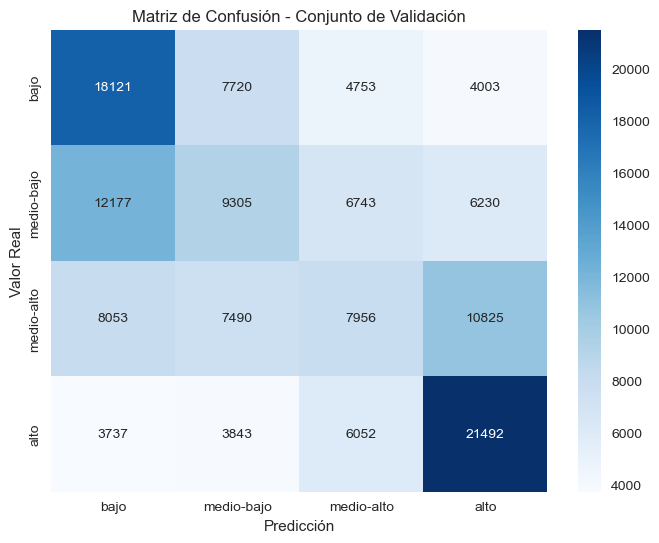

Accuracy para bajo: 0.5238
Accuracy para medio-bajo: 0.2701
Accuracy para medio-alto: 0.2318
Accuracy para alto: 0.6119


In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

unique_classes_val = sorted(np.union1d(y_val.unique(), np.unique(y_val_pred)))
target_names_val = [label_mapping[i] for i in unique_classes_val if i in label_mapping]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_val,
            yticklabels=target_names_val)
plt.title('Matriz de Confusión - Conjunto de Validación')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular accuracy por clase
class_accuracies = cm.diagonal() / cm.sum(axis=1)
for i, (class_idx, acc) in enumerate(zip(unique_classes_val, class_accuracies)):
    print(f"Accuracy para {label_mapping[class_idx]}: {acc:.4f}")

## Evaluación final en conjunto de prueba

Accuracy en conjunto de prueba: 0.4089

Clases presentes en prueba: [1.0, 2.0, 3.0, 4.0]
Etiquetas correspondientes: ['bajo', 'medio-bajo', 'medio-alto', 'alto']

Reporte de clasificación en conjunto de prueba:
              precision    recall  f1-score   support

        bajo       0.43      0.53      0.47     34597
  medio-bajo       0.32      0.27      0.29     34455
  medio-alto       0.31      0.23      0.27     34324
        alto       0.50      0.61      0.55     35124

    accuracy                           0.41    138500
   macro avg       0.39      0.41      0.40    138500
weighted avg       0.39      0.41      0.40    138500



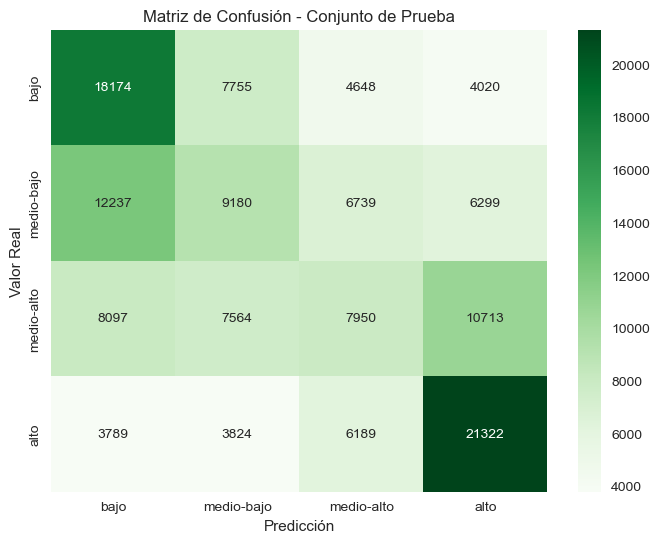

In [ ]:
# Predicciones en conjunto de prueba
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en conjunto de prueba: {test_accuracy:.4f}")

# Identificar clases presentes en prueba
unique_classes_test = sorted(np.union1d(y_test.unique(), np.unique(y_test_pred)))
target_names_test = [label_mapping[i] for i in unique_classes_test if i in label_mapping]

print(f"\nClases presentes en prueba: {unique_classes_test}")
print(f"Etiquetas correspondientes: {target_names_test}")

print("\nReporte de clasificación en conjunto de prueba:")
print(classification_report(y_test, y_test_pred, target_names=target_names_test, labels=unique_classes_test))

# Matriz de confusión para conjunto de prueba
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names_test,
            yticklabels=target_names_test)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

## Entrenamiento del modelo final

Entrenamos el modelo final usando todos los datos disponibles para obtener el mejor rendimiento posible

In [ ]:
# Entrenar modelo final con todos los datos
print("Entrenando modelo final con todos los datos...")

# Aplicar el mismo preprocesamiento a todos los datos
if categorical_cols:
    print(f"Codificando {len(categorical_cols)} columnas categóricas para todos los datos...")
    X_all_processed = X.copy()

    # Reajustar los encoders con todos los datos
    final_label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_all_processed[col] = le.fit_transform(X_all_processed[col].astype(str))
        final_label_encoders[col] = le
    print("Codificación final completada")
else:
    X_all_processed = X

# Escalar todos los datos
X_all_scaled = scaler.fit_transform(X_all_processed)

Entrenando modelo final con todos los datos...
Codificando 2 columnas categóricas para todos los datos...
Codificación final completada


In [ ]:
# Entrenar modelo final
final_model = models[best_model_name]
final_model.fit(X_all_scaled, y)

print(f"Modelo final entrenado: {best_model_name}")
print(f"Datos de entrenamiento: {X.shape[0]:,} muestras")
print(f"Características: {X.shape[1]} variables")
print(f"Preprocesamiento aplicado: {'Codificación categórica + ' if categorical_cols else ''}StandardScaler")

Modelo final entrenado: Gradient Boosting
Datos de entrenamiento: 692,500 muestras
Características: 51 variables
Preprocesamiento aplicado: Codificación categórica + StandardScaler


## Importancia de características

Analizamos qué características son más importantes para el modelo

Top 15 características más importantes:


,feature,importance
3,ESTU_VALORMATRICULAUNIVERSIDAD,0.444863
8,FAMI_EDUCACIONMADRE,0.114690
2,ESTU_PRGM_DEPARTAMENTO,0.049482
6,FAMI_EDUCACIONPADRE,0.048024
9,coef_1,0.040288
4,ESTU_HORASSEMANATRABAJA,0.033201
38,ESTU_PAGOMATRICULAPROPIO_Si,0.029553
5,FAMI_ESTRATOVIVIENDA,0.027286
1,PERIODO,0.026274
28,prgm_licenciatura en pedagogia infantil,0.025760


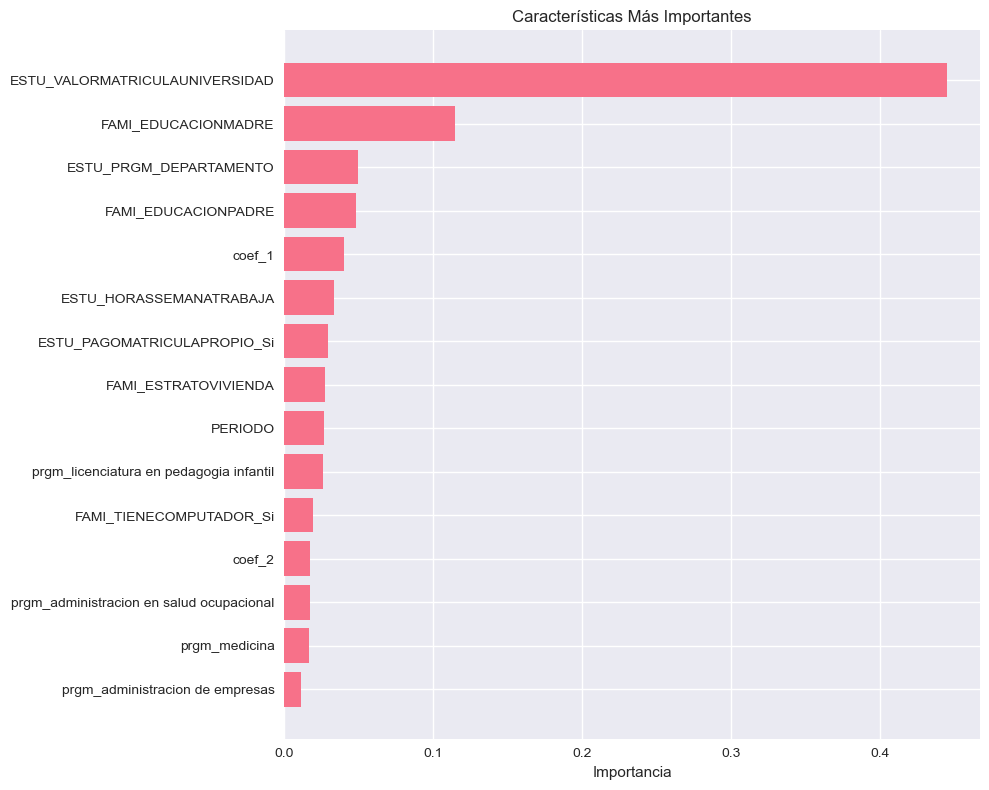

In [ ]:
# Mostrar importancia de características si el modelo lo permite
if hasattr(final_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': final_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 15 características más importantes:")
    display(feature_importance.head(15))

    # Visualización
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importancia')
    plt.title('Características Más Importantes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"El modelo {best_model_name} no proporciona importancia de características.")

## Preprocesamiento de datos de prueba

Aplicamos las mismas transformaciones a los datos de prueba que aplicamos a los datos de entrenamiento

In [ ]:
# Preprocesamiento completo de datos de prueba
print("plicando pipeline completo de preprocesamiento a datos de prueba...")
print(f"Datos de prueba originales: {df_test.shape}")

# Importar librerías necesarias para preprocesamiento
import unidecode as ud
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Crear copia para procesar
df_test_processed = df_test.copy()

# Tratamiento de valores nulos (igual que en entrenamiento)
print("\nTratando valores nulos...")
columns_to_fill = [
    'ESTU_VALORMATRICULAUNIVERSIDAD',
    'ESTU_HORASSEMANATRABAJA',
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'ESTU_PAGOMATRICULAPROPIO'
]

for col in columns_to_fill:
    if col in df_test_processed.columns:
        df_test_processed[col] = df_test_processed[col].fillna("no info")

print(f"Valores nulos rellenados en {len([col for col in columns_to_fill if col in df_test_processed.columns])} columnas")

# Normalizar nombres de programas académicos
print("\nNormalizando programas académicos...")
if 'ESTU_PRGM_ACADEMICO' in df_test_processed.columns:
    df_test_processed['ESTU_PRGM_ACADEMICO_ORIGINAL'] = df_test_processed['ESTU_PRGM_ACADEMICO'].copy()
    df_test_processed['ESTU_PRGM_ACADEMICO'] = df_test_processed['ESTU_PRGM_ACADEMICO'].apply(
        lambda x: ud.unidecode(str(x).lower())
    )

    # Agrupar programas
    # Los programas principales del entrenamiento eran:
    main_programs = [
        'derecho', 'contaduria publica', 'psicologia', 'administracion de empresas',
        'ingenieria de sistemas', 'medicina', 'enfermeria', 'ingenieria civil',
        'ingenieria industrial', 'economia', 'ingenieria electronica',
        'comunicacion social - periodismo', 'arquitectura', 'zootecnia',
        'medicina veterinaria', 'ingenieria mecanica', 'licenciatura en educacion infantil',
        'trabajo social', 'ingenieria quimica', 'licenciatura en lengua castellana'
    ]

    # Agrupar programas no principales como otros
    condition = ~df_test_processed['ESTU_PRGM_ACADEMICO'].isin(main_programs)
    df_test_processed.loc[condition, 'ESTU_PRGM_ACADEMICO'] = "otros"

    print(f"Programas académicos normalizados y agrupados")

# One-hot encoding para programas académémicos
print("\nAplicando One-Hot Encoding a programas...")
if 'ESTU_PRGM_ACADEMICO' in df_test_processed.columns:
    # Crear las mismas categorías que en entrenamiento
    all_programs = main_programs + ['otros']

    # One-hot encoding manual para asegurar consistencia
    for program in all_programs:
        df_test_processed[f'prgm_{program}'] = (df_test_processed['ESTU_PRGM_ACADEMICO'] == program).astype(int)

    print(f"One-Hot Encoding aplicado: {len(all_programs)} categorías")

# Codificación ordinal para variables categóricas
print("\nAplicando codificación ordinal...")
ordinal_categories = {
    'ESTU_VALORMATRICULAUNIVERSIDAD': [
        'no info', 'No pagó matrícula', 'Menos de 500 mil', 'Entre 500 mil y menos de 1 millón',
        'Entre 1 millón y menos de 2.5 millones', 'Entre 2.5 millones y menos de 4 millones',
        'Entre 4 millones y menos de 5.5 millones', 'Entre 5.5 millones y menos de 7 millones',
        'Más de 7 millones'
    ],
    'ESTU_HORASSEMANATRABAJA': [
        'no info', '0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas'
    ],
    'FAMI_ESTRATOVIVIENDA': [
        'no info', 'Sin Estrato', 'Estrato 1', 'Estrato 2', 'Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 6'
    ],
    'FAMI_EDUCACIONPADRE': [
        'no info', 'Ninguno', 'No sabe', 'No Aplica', 'Primaria incompleta', 'Primaria completa',
        'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
        'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa',
        'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'
    ],
    'FAMI_EDUCACIONMADRE': [
        'no info', 'Ninguno', 'No sabe', 'No Aplica', 'Primaria incompleta', 'Primaria completa',
        'Secundaria (Bachillerato) incompleta', 'Secundaria (Bachillerato) completa',
        'Técnica o tecnológica incompleta', 'Técnica o tecnológica completa',
        'Educación profesional incompleta', 'Educación profesional completa', 'Postgrado'
    ]
}

ordinal_cols_to_process = [col for col in ordinal_categories.keys() if col in df_test_processed.columns]
if ordinal_cols_to_process:
    for col in ordinal_cols_to_process:
        # Mapear valores a números
        value_to_num = {val: idx for idx, val in enumerate(ordinal_categories[col])}
        df_test_processed[col] = df_test_processed[col].map(value_to_num).fillna(0)

    print(f" Codificación ordinal aplicada a {len(ordinal_cols_to_process)} columnas")

# One-Hot Encoding para variables binarias
print("\nAplicando One-Hot Encoding a variables binarias...")
binary_vars = ['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENELAVADORA',
               'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR']

for col in binary_vars:
    if col in df_test_processed.columns:
        df_test_processed[col] = df_test_processed[col].fillna("no info")

        # Crear variables dummy para las categorías esperadas
        categories = ['No', 'Si', 'no info'] if col != 'ESTU_PRIVADO_LIBERTAD' else ['N', 'S']

        for cat in categories:
            df_test_processed[f'{col}_{cat}'] = (df_test_processed[col] == cat).astype(int)

        # Eliminar columna original
        df_test_processed.drop(col, axis=1, inplace=True)

print(f" One-Hot Encoding aplicado a {len([col for col in binary_vars if col in df_test.columns])} variables binarias")

# Preparar características finales para el modelo
print("\n Preparando características finales...")

# Eliminar columnas que no son características
columns_to_drop_test = ['ESTU_CONSECUTIVO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_ACADEMICO_ORIGINAL']
columns_to_drop_test = [col for col in columns_to_drop_test if col in df_test_processed.columns]

# También eliminar columnas que no están en el conjunto de entrenamiento
X_test_kaggle = df_test_processed.drop(columns=columns_to_drop_test)

# Asegurar que tenemos las mismas columnas que en entrenamiento
missing_cols = set(X.columns) - set(X_test_kaggle.columns)
extra_cols = set(X_test_kaggle.columns) - set(X.columns)

# Agregar columnas faltantes con ceros
for col in missing_cols:
    X_test_kaggle[col] = 0

# Eliminar columnas extra
for col in extra_cols:
    if col in X_test_kaggle.columns:
        X_test_kaggle.drop(col, axis=1, inplace=True)

# Reordenar columnas para que coincidan con entrenamiento
X_test_kaggle = X_test_kaggle[X.columns]

print(f" Preprocesamiento completado")
print(f" Forma final de datos de prueba: {X_test_kaggle.shape}")
print(f" Columnas coinciden con entrenamiento: {X_test_kaggle.shape[1] == X.shape[1]}")
print(f" Pipeline completo aplicado: normalización, agrupación, codificación ordinal y one-hot encoding")

# Verificar tipos de datos
if X_test_kaggle.dtypes.eq('object').any():
    print(" Algunas columnas siguen siendo object")
    for col in X_test_kaggle.select_dtypes(include=['object']).columns:
        X_test_kaggle[col] = pd.to_numeric(X_test_kaggle[col], errors='coerce').fillna(0)

print(f" Todos los datos son numéricos: {X_test_kaggle.dtypes.eq('object').sum() == 0}")

# Aplicar el mismo escalado categórico si es necesario
if categorical_cols:
    # Usar los mismos encoders entrenados anteriormente
    X_test_kaggle_processed = X_test_kaggle.copy()

    for col in categorical_cols:
        if col in X_test_kaggle_processed.columns and col in final_label_encoders:
            try:
                # Manejar valores no vistos durante entrenamiento
                unique_values = X_test_kaggle_processed[col].unique()
                known_values = final_label_encoders[col].classes_
                unknown_mask = ~X_test_kaggle_processed[col].isin(known_values)

                if unknown_mask.any():
                    # Asignar valores desconocidos a la categoría más común del entrenamiento
                    most_common = known_values[0]  # o usar la moda
                    X_test_kaggle_processed.loc[unknown_mask, col] = most_common

                X_test_kaggle_processed[col] = final_label_encoders[col].transform(X_test_kaggle_processed[col].astype(str))
            except:
                # Si hay problemas, usar codificación simple
                le_temp = LabelEncoder()
                X_test_kaggle_processed[col] = le_temp.fit_transform(X_test_kaggle_processed[col].astype(str))

    X_test_kaggle = X_test_kaggle_processed
    print("Codificación categórica final aplicada")

print(f"\n Preprocesamiento de datos de prueba completado")
print(f" Forma final: {X_test_kaggle.shape}")
print(f" Listo para predicciones")

plicando pipeline completo de preprocesamiento a datos de prueba...
Datos de prueba originales: (296786, 20)

Tratando valores nulos...
Valores nulos rellenados en 6 columnas

Normalizando programas académicos...
✅ Programas académicos normalizados y agrupados

Aplicando One-Hot Encoding a programas...
One-Hot Encoding aplicado: 21 categorías

Aplicando codificación ordinal...
 Codificación ordinal aplicada a 5 columnas

Aplicando One-Hot Encoding a variables binarias...
 One-Hot Encoding aplicado a 6 variables binarias

 Preparando características finales...
 Preprocesamiento completado
 Forma final de datos de prueba: (296786, 51)
 Columnas coinciden con entrenamiento: True
 Pipeline completo aplicado: normalización, agrupación, codificación ordinal y one-hot encoding
 Algunas columnas siguen siendo object
 Todos los datos son numéricos: True
Codificación categórica final aplicada

 Preprocesamiento de datos de prueba completado
 Forma final: (296786, 51)
 Listo para predicciones


## Generación de predicciones para Kaggle

Predicciones generadas: 296786

Distribución de predicciones:
alto          100195
bajo           95723
medio-bajo     54012
medio-alto     46856
Name: count, dtype: int64


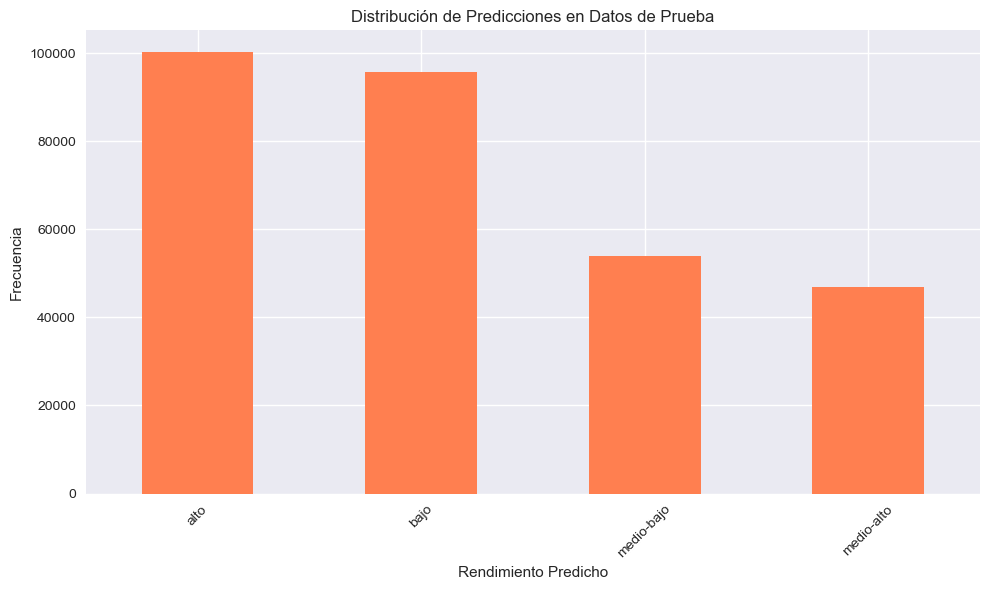

In [ ]:
# Normalizar datos de prueba
X_test_kaggle_scaled = scaler.transform(X_test_kaggle)

# Generar predicciones
test_predictions = final_model.predict(X_test_kaggle_scaled)

# Convertir predicciones numéricas a etiquetas de texto
prediction_labels = [label_mapping[pred] for pred in test_predictions]

print(f"Predicciones generadas: {len(test_predictions)}")
print("\nDistribución de predicciones:")
pred_counts = pd.Series(prediction_labels).value_counts()
print(pred_counts)

# Visualizar distribución de predicciones
plt.figure(figsize=(10, 6))
pred_counts.plot(kind='bar', color='coral')
plt.title('Distribución de Predicciones en Datos de Prueba')
plt.xlabel('Rendimiento Predicho')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Creación del archivo de submission para Kaggle

In [ ]:
# Verificar columnas disponibles en df_test
print("Columnas en df_test:")
print(df_test.columns.tolist())

# Crear DataFrame de submission
if 'ID' in df_test.columns:
    submission = pd.DataFrame({
        'ID': df_test['ID'],
        'RENDIMIENTO_GLOBAL': prediction_labels
    })
elif 'ESTU_CONSECUTIVO' in df_test.columns:
    submission = pd.DataFrame({
        'ID': df_test['ESTU_CONSECUTIVO'],
        'RENDIMIENTO_GLOBAL': prediction_labels
    })
else:
    print("Columna de ID no encontrada, se usará el índice como ID.")
    submission = pd.DataFrame({
        'ID': range(1, len(prediction_labels) + 1),
        'RENDIMIENTO_GLOBAL': prediction_labels
    })

# Guardar archivo CSV
submission_filename = 'submission.csv'
submission.to_csv(submission_filename, index=False)
print(f"Archivo guardado: {submission_filename}")
print(f"Total de predicciones: {len(submission)}")
display(submission.head(10))

# Validar formato
print("Columnas:", list(submission.columns))
print("Tipos de datos:", submission.dtypes.to_dict())
print("Valores únicos en RENDIMIENTO_GLOBAL:", submission['RENDIMIENTO_GLOBAL'].unique())

# Validar columnas y tipos
print("Columna ID presente:", 'ID' in submission.columns)
print("Columna RENDIMIENTO_GLOBAL presente:", 'RENDIMIENTO_GLOBAL' in submission.columns)
print("RENDIMIENTO_GLOBAL es categórica:", submission['RENDIMIENTO_GLOBAL'].dtype == 'object')

# Verificar valores nulos
if submission.isnull().sum().sum() == 0:
    print("No hay valores nulos")
else:
    print("Hay valores nulos:")
    print(submission.isnull().sum())

Columnas en df_test:
['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2', 'coef_3', 'coef_4']
Archivo guardado: submission.csv
Total de predicciones: 296786


,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-alto
2,499179,medio-alto
3,782980,bajo
4,785185,bajo
5,58495,medio-bajo
6,705444,alto
7,557548,alto
8,519909,medio-bajo
9,832058,alto


Columnas: ['ID', 'RENDIMIENTO_GLOBAL']
Tipos de datos: {'ID': dtype('int64'), 'RENDIMIENTO_GLOBAL': dtype('O')}
Valores únicos en RENDIMIENTO_GLOBAL: ['alto' 'medio-alto' 'bajo' 'medio-bajo']
Columna ID presente: True
Columna RENDIMIENTO_GLOBAL presente: True
RENDIMIENTO_GLOBAL es categórica: True
No hay valores nulos


In [ ]:
!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submission.csv -m "Preprocesado 1"

Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia


  0%|          | 0.00/4.22M [00:00<?, ?B/s]
  0%|          | 8.00k/4.22M [00:00<03:15, 22.6kB/s]
  3%|3         | 136k/4.22M [00:00<00:12, 357kB/s]  
  5%|4         | 208k/4.22M [00:00<00:09, 446kB/s]
  7%|6         | 296k/4.22M [00:00<00:07, 543kB/s]
  9%|9         | 400k/4.22M [00:00<00:06, 665kB/s]
 12%|#2        | 536k/4.22M [00:00<00:04, 855kB/s]
 16%|#6        | 712k/4.22M [00:01<00:03, 1.11MB/s]
 21%|##        | 904k/4.22M [00:01<00:02, 1.35MB/s]
 25%|##5       | 1.07M/4.22M [00:01<00:02, 1.51MB/s]
 32%|###1      | 1.34M/4.22M [00:01<00:01, 1.88MB/s]
 36%|###6      | 1.52M/4.22M [00:01<00:02, 995kB/s] 
 40%|###9      | 1.67M/4.22M [00:02<00:04, 669kB/s]
 42%|####2     | 1.79M/4.22M [00:02<00:03, 741kB/s]
 45%|####5     | 1.92M/4.22M [00:02<00:02, 840kB/s]
 49%|####8     | 2.06M/4.22M [00:02<00:02, 937kB/s]
 52%|#####1    | 2.19M/4.22M [00:02<00:03, 609kB/s]
 55%|#####4    | 2.31M/4.22M [00:03<00:02, 713kB/s]
 58%|#####7    | 2.43M/4.22M [00:03<00:02, 799kB/s]
 62%|######1   | 2

In [ ]:
!kaggle competitions submissions -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

fileName           date                        description     status                     publicScore  privateScore  
-----------------  --------------------------  --------------  -------------------------  -----------  ------------  
submission.csv     2025-07-03 18:38:55.810000  Preprocesado 1  SubmissionStatus.COMPLETE  0.40097                    
submission_rf.csv  2025-07-03 18:17:28.673000  Preprocesado 1  SubmissionStatus.ERROR                                
